# This notebook plots the BPZ statistics of a photometric realisation of a mock sample.

In [2]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../plotting/')
import plots_zy as plot

LSST_path = os.path.expanduser('~')+'/DATA/LSST/SPECZ/DIR_zCOSMOS.fits'
LSST_file = fits.open(LSST_path, mode="update")
LSST_file[1].columns

In [3]:
from importlib import reload  # Python 3.4+
reload(plot)

<module 'plots_zy' from '../plotting/plots_zy.py'>

## Read mock LSST sample with 10 year accumulative photometry

In [24]:
lsst_path = '/net/home/fohlen13/yanza21/DATA/mocks/cosmoDC2/LSST_10yr_mock/DC2_LSST.fits'
lsst_file = fits.open(lsst_path, mode="update")

zspec_dc2mock_lsst = lsst_file[1].data['redshift']
zb_dc2mock_lsst = lsst_file[1].data['Z_B']
mag_dc2mock_lsst = lsst_file[1].data['mag_r_lsst_obs']

(0.0, 3.0)

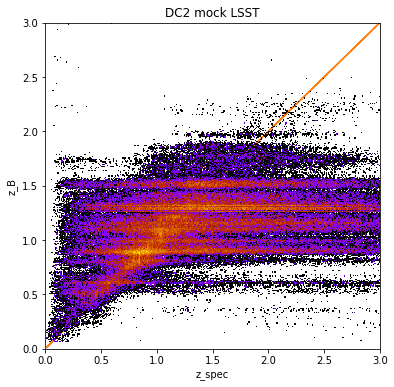

In [26]:
import copy
import matplotlib as mpl
fig = plt.figure(figsize=(6,6))
my_cmap = copy.copy(plt.cm.get_cmap("gnuplot"))
my_cmap.set_under('w',0.1)
plt.plot(zspec_dc2mock_lsst, zspec_dc2mock_lsst, color='C1', zorder=0)
plt.title('DC2 mock LSST')

h=plt.hist2d(zspec_dc2mock_lsst, zb_dc2mock_lsst, bins=(1000,1000), norm=mpl.colors.LogNorm(), cmap=my_cmap)
plt.xlabel('z_spec')
plt.ylabel('z_B')
plt.xlim(0, 3)
plt.ylim(0, 3)

../plotting/plots_zy.py:57: RuntimeWarning: invalid value encountered in true_divide
  np.abs(stat[bin_mask] - (dzs/znorms)[i]))
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/net/home/fohlen13/yanza21/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm


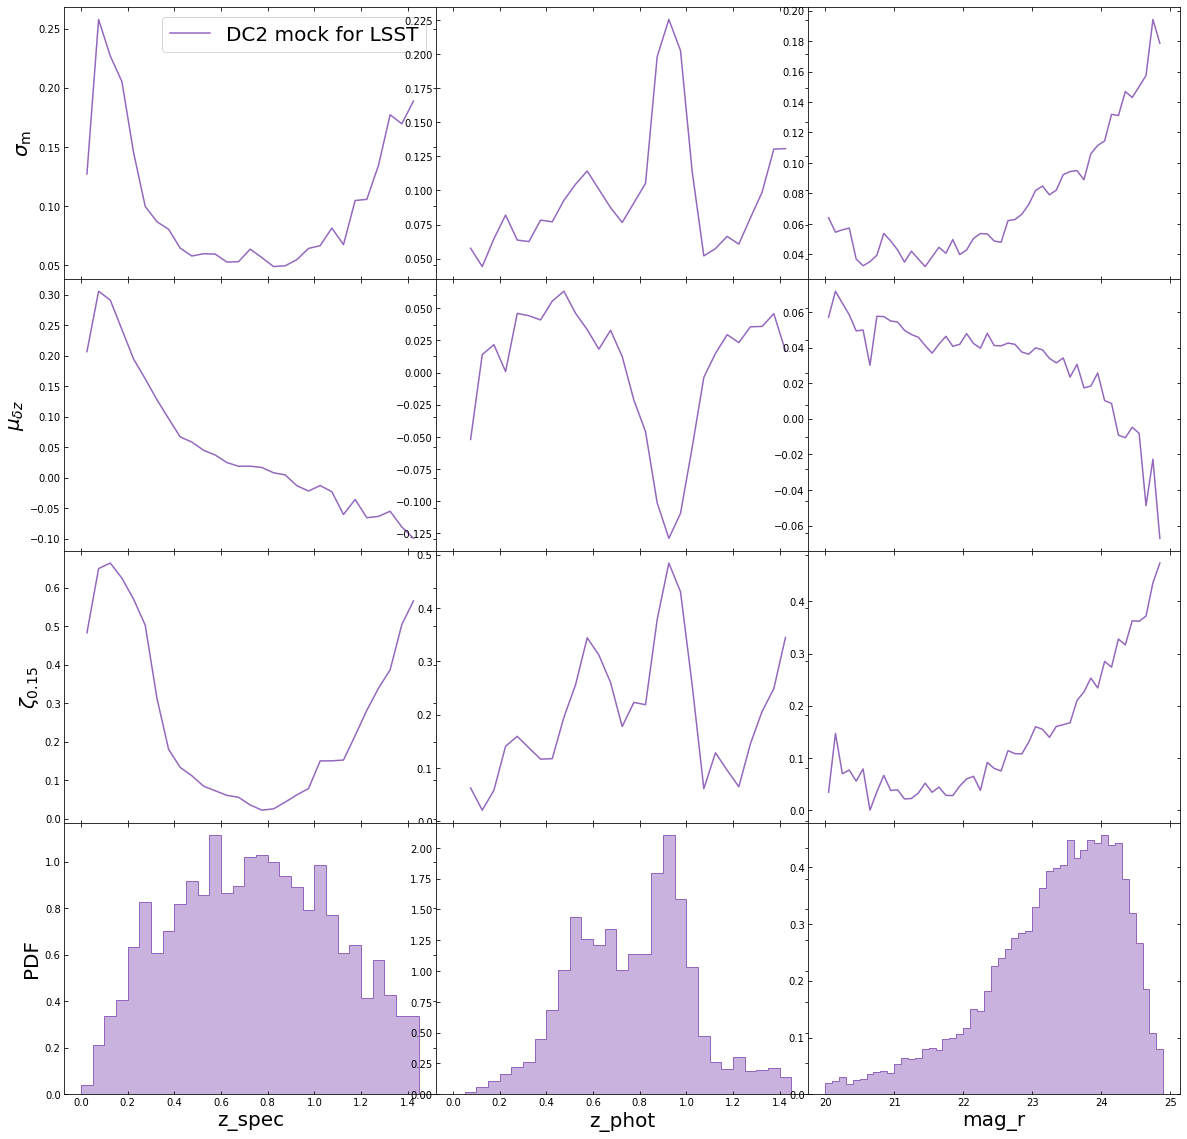

In [20]:
fig, axes = plt.subplots(4,3, figsize=(20, 20))
plot.plot_BPZ_stats(zspec_dc2mock_lsst, zb_dc2mock_lsst, mag_dc2mock_lsst, axes, color='C4',
                    zbin=np.arange(0,1.5,0.05), 
                    magbin=np.arange(20,25,0.1),
                    survey_label='DC2 mock for LSST')

axes[0][0].legend(fontsize=20)

for i in range(4):
    for j in range(3):
        axes[i][j].tick_params("both", direction="in",
                bottom=True, top=True, left=True, right=True)
        #axes[i][j].sharey(axes[i][0])
        axes[i][j].sharex(axes[0][j])
        axes[i][j].xaxis.label.set_size(20)
        axes[i][j].yaxis.label.set_size(20)

#axes[0][2].set_ylim(0, 0.2)
#axes[1][2].set_ylim(-0.2, 0.2)
plt.subplots_adjust(wspace=0, hspace=0) 